# Notas sobre Proyecciones Oblicuas

## Proyectores

### Definición:
Sea $\mathcal{V}\subset\mathbb{R}^{N}$, tal que $\mathcal{V}=\mathcal{X}\oplus\mathcal{Y}$ i.e. para cada $\mathbf{v}\in\mathcal{V}$, existen $\mathbf{x}\in\mathcal{X}$, $\mathbf{y}\in\mathcal{Y}$ donde $\mathbf{v} = \mathbf{x} + \mathbf{y}$. El operador lineal

$$
\mathbf{P}:\mathcal{V}\rightarrow\mathcal{V},\\
\mathbf{Pv}=\mathbf{x}
$$

es el **proyector sobre $\mathcal{X}$ a lo largo de $\mathcal{Y}$**

### Propiedades

* **Idempotencia:** $\mathbf{P}^2=\mathbf{P}$. (*una vez aplicada la proyección, ya estoy viviendo en donde quería proyectar. Cualquier otra aplicación de la proyección me lleva a lo mismo*)

* **Proyector complementario:** $\mathbf{I}-\mathbf{P}$ es el proyector sobre $\mathcal{Y}$ a lo largo de $\mathcal{X}$. (*basta cambiar la dirección para cambiar entre subespacio objetivo y subespacio referente*)

* **Rango-Nulidad:** $R(\mathbf{P}) = N(\mathbf{I}-\mathbf{P}) = \mathcal{X}$ (*El rango de mi subespacio objetivo corresponde a la nulidad de mi proyección complementaria*)

* **Clasificación:** Si $\mathcal{X}\perp\mathcal{Y}$ se dice que $\mathbf{P}$ es un ***proyector ortogonal***, en caso contrario ***proyector oblicuo***. Si bien la ortogonalidad facilita la construcción de un proyector en un espacio de Hilbert *(espacio vectorial con producto interior que induce una norma y es completo)* esto no siempre se tiene ni se puede garantizar.

### Construcción de Proyectores Oblicuos:
Inicialmente desde [libro] se tiene que:
$$
\mathbf{P} = [\mathbf{X}|\mathbf{0}][\mathbf{X}|\mathbf{Y}]^{-1}= [\mathbf{X}|\mathbf{Y}]\begin{pmatrix}
\mathbf{I} & \mathbf{0}\\
\mathbf{0} & \mathbf{0}
\end{pmatrix}[\mathbf{X}|\mathbf{Y}]^{-1}
$$
donde $C(\mathbf{X})=\mathcal{X}$ y $C(\mathbf{Y})=\mathcal{Y}$.

Ahora, en los desarrollos del profe Alexander:
$$
\mathbf{P} = \mathbf{X}^{T}\left(\mathbf{X}^{T}\mathbf{Q}_{Y}\mathbf{X}\right)^{\dagger}\mathbf{X}^{T}\mathbf{Q}_{Y}
$$
donde:
$$
\mathbf{Q}_{Y} = \mathbf{I} - \mathbf{P}_{Y}\\
\mathbf{P}_{Y} = \mathbf{Y}^{T}\left(\mathbf{Y}^{T}\mathbf{Y}\right)^{\dagger}\mathbf{Y}^{T}: \text{Proyector Ortogonal sobre Y}\\
\dagger:=\text{Pseudoinversa de Moore-Penrose}
$$
<span style="color:green">REVISAR ALGORITMO</span>

### Uso en interpretabilidad de NN: Desde un enfoque de post-hoc XAI
Los proyectores oblicuos permiten descomponer un output en las contribuciones parciales no lineales de algunos inputs. En este caso particular de redes neuronales, en el caso de feed forward, se tiene:

#### Notación matricial:
Considere una red neuronal de $l$ capas, ya entrenada, cuyo conjunto de observación es $\{\mathbf{x}^{(i)}, y^{(i)}\}^{N}_{i=1}$. Para cada $j\in \{1, \dots, l\}$, la capa $j$ viene definida por $\{\mathbf{W}_{j}, \mathbf{b}_{j}, f_{j}(\cdot)\}$ donde $\mathbf{W}_{j}$ es la matriz de pesos de la capa, $\mathbf{b}_{j}$, el vector de bias y $f_{j}(\cdot)$ la función de activación. En ese sentido, el output de la última capa de la red se puede definir como:

$$
\hat{y}^{(i)} = f_{l}\left(\mathbf{W}_{l}\mathbf{z}^{(i)}+b_{l}\right)
$$

donde $\mathbf{z}\in\mathbb{R}^{p}$ es el output de la penúltima capa. Desde el punto de vista del espacio latente, (espacio de representación de la red neuronal):

$$
\hat{y}_{\text{latent}} = \mathbf{W}_{l}\mathbf{z}^{(i)}+b_{l}
$$
y sin pérdida de generalidad:

$$
\hat{\mathbf{y}}_{\text{latent}}-b_{l} = \mathbf{Z}\mathbf{W}_{l}^{T}
$$
con $\mathbf{Z}\in\mathbb{R}^{N\times p}$ y $\mathbf{Z} = \left[\left(\mathbf{z}^{(1)}\right)^{T};\cdots;\left(\mathbf{z}^{(N)}\right)^{T}\right]$

<span style="color:red">1. ¿Z es el generado por los outputs de la penúltima capa de todas las observaciones?</span>. Sí

#### En términos de las contribuciones:
$$
\hat{y}_{\text{latent}} = \sum_{k=1}^{d}g_{k}(x_{k}) + \sum_{k=1}^{d}\sum_{m>k}^{d}g_{k,m}(x_{k}, x_{m}) + \mathbf{G} + b_{l}
$$
donde:

* $g_{k}(\cdot)$: contribuciones no lineales en la salida de la $k$-ésima variable de entrada.

* $g_{k, m}(\cdot)$: efecto de interacción entre las $k$-ésima y $m$-ésima variables de entrada.

* $\mathbf{G}$: efectos de interacción de ordenes superiores


#### Relación con el desarrollo previo:
* $\mathcal{V}:=C(\mathbf{Z})$ (*en Z están embedidas las transformaciones no lineales que realiza la red neuronal sobre cada input*)

* $\hat{\mathbf{y}}_{k} = g_{k}(\mathbf{x}_{k})$: transformación no lineal del vector $\mathbf{x}_{k}$ en el output, donde
$$
\mathbf{x}_{k} = \left[x_{k}^{(1)}, \dots, x_{k}^{(N)}\right]^{T}
$$
<span style="color:red">2. ¿este vector x_k, es el vector con las k-ésimas entradas de todos los inputs?</span> Sí

* $\mathbf{Z} = f_{NN}(\mathbf{X})$ donde $f_{NN}:\mathbb{R}^{N\times d}\rightarrow \mathbb{R}^{N\times p}$ es la función que representa el mapeo desde el espacio de entrada hacia la penúltima capa de la red (*es lo que queremos desarmar*). En este caso:
$$
\mathbf{X} = \left[\left(\mathbf{x}^{(1)}\right);\dots;\left(\mathbf{x}^{(N)}\right)\right]^{T}
$$
<span style="color:red">3. ¿X es entonces la matriz de todas las observaciones, de todas las variables de entrada?</span> Sí, son mis datos

* $\mathcal{V} = \mathcal{V}_{k}\oplus\mathcal{V}_{(k)}$, donde:

    * $\mathcal{V}_{k} = C\left(\mathbf{Z}_{k}\right)$
    
        * $\mathbf{Z}_{k} = f_{NN}(\mathbf{X}_{k})$
    
        * $\mathbf{X}_{k} = \left[\left(\mathbf{0}_{N}\right)_{1}, \dots ,\left(\mathbf{0}_{N}\right)_{k-1}, \mathbf{x}_{k}, \left(\mathbf{0}_{N}\right)_{k+1}, \dots, \left(\mathbf{0}_{N}\right)_{d}\right]$
        
        <span style="color:red">4. ¿el subespacio objetivo, es el subespacio de las contribuciones del k-esimo input?</span>
    
    * $\mathcal{V}_{(k)} = C\left(\mathbf{Z}_{(k)}\right)$
    
        * $\mathbf{Z}_{(k)} = f_{NN}(\mathbf{X}_{(k)})$
    
        * $\mathbf{X}_{(k)} = \left[\mathbf{x}_{1}, \dots, \mathbf{x}_{k-1}, \left(\mathbf{0}_{N}\right)_{k}, \mathbf{x}_{k+1}, \dots, \mathbf{x}_{d}\right]$
        
        <span style="color:red">5. ¿el subespacio referente, es el subespacio de las contribuciones de todos los demás inputs?</span>
        
<span style="color:red">6. ¿Cómo se computa la función $f_{NN}$?</span> ES LA RED YA ENTRENADA
        
* Finalmente $\hat{\mathbf{y}} = \mathbf{P}_{k/(k)}\left(\hat{\mathbf{y}}_{\text{latent}}-b_{l}\right)$, donde:

    * $\mathbf{P}_{k/(k)} = \mathbf{Z}_{k}\left(\mathbf{Z}_{k}^{T}\mathbf{Q}_{(k)}\mathbf{Z}_{k}\right)^{\dagger}\mathbf{Z}_{k}^{T}\mathbf{Q}_{(k)}$
    
        * $\mathbf{Q}_{(k)} = \mathbf{I}_{N}-\mathbf{P}_{(k)}$ (ver definición)
    

## Implementación Algoritmo para NN:

In [1]:
import torch
import numpy as np
import random
import matplotlib.pyplot as plt
from torchviz import make_dot
from sklearn.model_selection import train_test_split
from torch import nn
import torch.nn.functional as F

### Función ObSP(X, Y):

Para la implementación del algoritmo, primero se define la función ObSP. Esta función recibe:
* X: Matriz cuyas columnas constituyen una base para el subespacio objetivo.
* Y: Matriz cuyas columnas constituyen una base para el subespacio de referencia.

Entrega:
* Una matrix P_xy con la proyección sobre X a lo largo de Y

In [2]:
def ObSP(X, Y):
    # Function to compute the oblique projection onto X along the reference space defined by Y.
    # The input data is the following:
    # X: a matriz of size Nxd, containing the basis for the subspace where the data will be projected
    # Y: a matrix of size Nxd, containing the basis for the reference subspace
    #
    # The function returns the oblique projection matrix of size NxN.

    # Converting the input data into torch tensors
    if not torch.is_tensor(X):
        X = torch.from_numpy(X)
    if not torch.is_tensor(Y):
        Y = torch.from_numpy(Y)

    # Computing the size of X
    N, d = X.size()
    
    # Conputing the orthogonal projection matriz onto the subsapce given by Y
    P = (
        Y @ torch.linalg.pinv(torch.t(Y) @ Y) @ torch.t(Y)
    )
    
    # Computing the complement of P
    Q = torch.eye(N, N) - P
    
    
    # Computing the oblique projection matriz onto X along Y
    P_xy = (
        X @ torch.linalg.pinv(torch.t(X) @ Q @ X) @ torch.t(X) @ torch.t(Q)
    )

    return P_xy

In [3]:
N = 6
d = 3

In [4]:
X = np.random.randn(N, d)
X

array([[ 0.87525367, -0.37365774, -0.65487641],
       [-1.39844768,  0.67671927,  0.31857907],
       [ 0.81798722,  0.03487725, -0.6115279 ],
       [-3.23458978, -0.22812163, -0.4680108 ],
       [ 0.75291355, -1.16472771,  1.34502413],
       [ 0.53618189,  2.10444545, -0.21253499]])

In [5]:
y = np.random.randn(N, d)
y

array([[ 0.02743277, -0.36352416, -1.08306409],
       [-0.63320587, -0.32716178, -0.64367638],
       [-1.04104795, -1.03564269, -0.16742299],
       [-0.81833727,  0.32321474, -0.63420893],
       [-0.14954191,  0.97477726,  0.49991395],
       [-0.02347624,  1.55444225, -0.05877147]])

In [6]:
ObSP(X, y)

tensor([[ 0.2424, -0.6596,  0.2813,  0.1612, -0.0158,  0.0817],
        [-0.3564,  0.5383, -0.2886, -0.0227, -0.2076, -0.0274],
        [ 0.1577, -0.4896,  0.2579,  0.0693, -0.0966,  0.1518],
        [-0.4280, -0.2422, -0.3765,  0.7429, -0.4546, -0.2713],
        [ 0.2411,  0.5755, -0.1718, -0.3432,  0.7323, -0.3248],
        [-0.2815,  0.5046,  0.1006, -0.4592, -0.4518,  0.4862]],
       dtype=torch.float64)

In [7]:
ObSP(X, y)@ObSP(X, y)

tensor([[ 0.2424, -0.6596,  0.2813,  0.1612, -0.0158,  0.0817],
        [-0.3564,  0.5383, -0.2886, -0.0227, -0.2076, -0.0274],
        [ 0.1577, -0.4896,  0.2579,  0.0693, -0.0966,  0.1518],
        [-0.4280, -0.2422, -0.3765,  0.7429, -0.4546, -0.2713],
        [ 0.2411,  0.5755, -0.1718, -0.3432,  0.7323, -0.3248],
        [-0.2815,  0.5046,  0.1006, -0.4592, -0.4518,  0.4862]],
       dtype=torch.float64)

### Desarmando el algoritmo

### 1. Armamos el ejemplo

In [8]:
N = 1000; # Defining the number of datapoints
epochs = 2000 # Definning numebr of epochs to train the models
learning_rate = 0.05 # DEfining learning rate of the model

In [9]:
# Input variables
x0 = np.random.randn(N,)/3
x1 = np.random.randn(N,)/3
x2 = np.random.randn(N,)/3
x3 = np.random.randn(N,)
x4 = np.random.randn(N,)/3

In [10]:
# Nonlinear functions definition
g0 = x0**2
g1 = x1**3
g2 = np.exp(x2)
g3 = np.sin(2*x3)
g4 = np.zeros(N,) # Notice that the contribution of x4 on the output is zero.
g01 = 1*np.exp((x0+x1)) # Second order interaction effect
noise = 0.01*np.random.randn(N,) # noise vector

In [11]:
y =  g0 + g1 + g2 + g3 + g4 + noise # Simulation done using only first order interactions in the output.

In [12]:
# Generating the input matriz for training
X = np.stack((x0, x1, x2, x3, x4), axis=1)
t = np.arange(0,N)

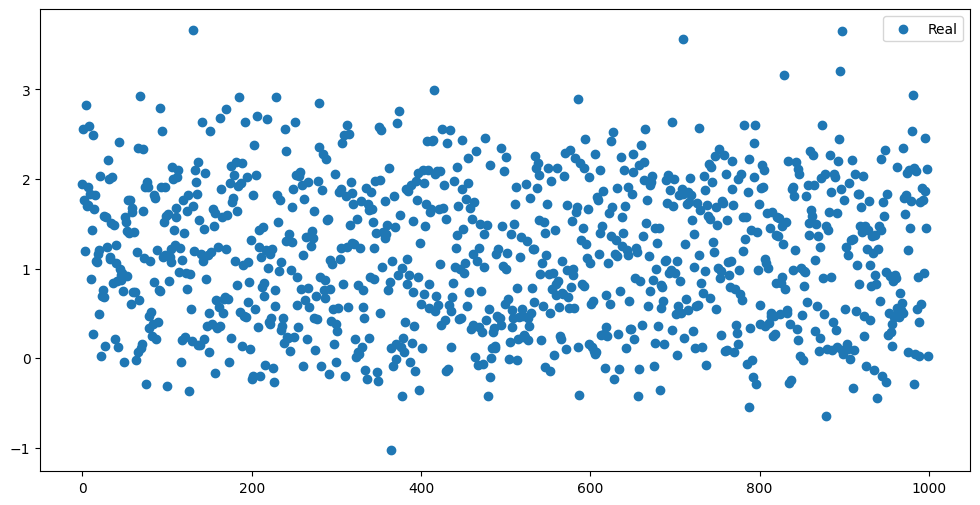

In [21]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.scatter(t, y, label = 'Real')
ax.legend()
plt.show()

In [13]:
## Preparing the data for the model

train_split = int(0.8*N) # 80% of the data to be used as training

X = torch.from_numpy(X).type(torch.float) # Converting the input matrix to a Pytorch tensor format 
y = torch.from_numpy(y).type(torch.float).unsqueeze(dim=-1) # Converting the output data to a Pytorch tensor format 

# Normalizing the input data
X_mean = torch.mean(X,dim=0) 
X_var = torch.var(X,dim=0)
X = (X-X_mean)/X_var

# Split of the data for training and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = train_split,
                                                    random_state=42) 

### Arquitectura y visualización

In [14]:
class Regression_NN(nn.Module):
    def __init__(self, in_number, out_number):
        super(Regression_NN, self).__init__()
        self.Linear_1 = nn.Linear(in_features = in_number, out_features = 100)
        self.Linear_2 = nn.Linear(in_features = 100, out_features = 500)
        self.Linear_3 = nn.Linear(in_features = 500, out_features = 1000)
        self.Linear_4 = nn.Linear(in_features = 1000, out_features = 1000)
        self.Linear_5 = nn.Linear(in_features = 1000, out_features = out_number)
        
    def forward(self,x):
        x = F.relu(self.Linear_1(x))
        x = F.relu(self.Linear_2(x))
        x = F.relu(self.Linear_3(x))
        x_t = F.relu(self.Linear_4(x)) # Computing the transformation done to the vector in the layer previous to the output
        x = self.Linear_5(x_t)
        
        return x, x_t

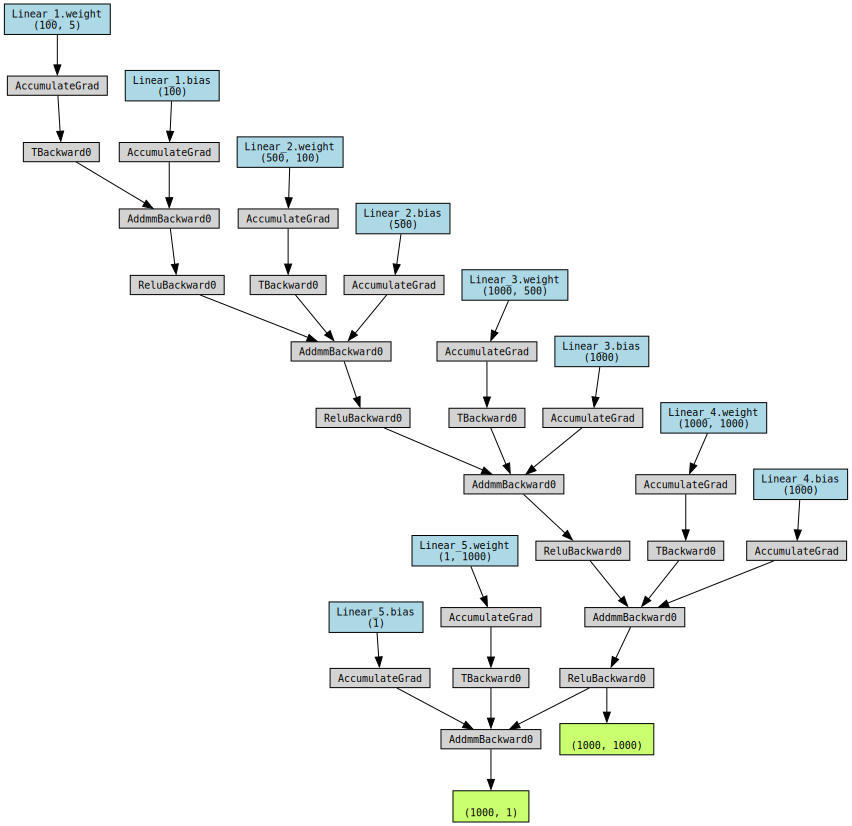

In [18]:
model_viz = Regression_NN(5,1)
viz = model_viz(X)
make_dot(viz, params=dict(model.named_parameters()))

### Etrenamiento del modelo

In [ ]:
## Creating model for single nonlinear effects

model_1 = Regression_NN(5,1) # Creating the model
loss_fcn = nn.MSELoss() # Definning loss function
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=learning_rate)  # Defining optimizer

In [ ]:
for epoch in range(epochs):
    model_1.train() # Setting the model in training mode
    y_p, x_p = model_1(X_train) #forward pass
    #y_p.squeeze()
    loss = loss_fcn(y_p,
                    y_train)  # Compute Loss
    loss.backward() # compute backward
    optimizer.step() # update parameters
    optimizer.zero_grad() #zero grad optimizer
    
    ## Testing
    model_1.eval() # Setting the model in evalaution mode
    with torch.inference_mode():
        y_pred, x_trans = model_1(X_test) # Estimating th emodel output in test data
    
    test_loss = loss_fcn(y_pred,
                         y_test) # Evaluating loss
    
    if epoch % 100 == 0:
        print(f'Epoch: {epoch} | Loss: {loss:.5f} | test Loss: {test_loss:.5f}') # Printing the performance of the model as it is trained

In [ ]:
model_1.eval() # Setting the model in evaluation mode
with torch.inference_mode():
    y_est_1, x_trans_total_1 = model_1(X) # Computin ght enonlinear transformation of the input data X

### El algoritmo

In [ ]:
y_est = y_est_1
model = model_1

model.eval()  # Setting the model in evaluation mode
N = np.size(X, 0)  # computing the size of X along dimension 0
d = np.size(X, 1)  # computing the size of X along dimension 1
y_est = y_est.reshape((-1, 1))  # Converting to a vector with dimension 1
P_xy = np.zeros((N, N, d))  # Initializing proyection matrices
y_e = torch.from_numpy(np.zeros((N, d))).type(
    torch.float
)  # Initializing Matriz where the estimated nonlinear contributions will be stored, converting to a tensor object
neurons_last = list(model.children())[
    -1
].in_features  # Obtaining the dimension of the subspace where the data lies (number of neurons in the last layer)
Alpha = torch.zeros(
    neurons_last, d
)  # Initializing the matrix for the Alpha coefficients, out-of-sample extension, using the dimension where the transformed data lies

# Computing the transformation of the input data using inference mode, and extracting the evaluation of the input on the network up to the last layer.
with torch.inference_mode():
    y_target, X_target_tot = model(X)

# X_target_tot = X_target_tot-torch.mean(X_target_tot,dim=0) # Centaring the data
P_x_target = torch.linalg.pinv(torch.t(X_target_tot) @ X_target_tot) @ torch.t(
    X_target_tot
)  # Finding the projection matrix onto the matrix tused to find the alpha coeficients, out-of-sample extension

for i in range(d):
    # Defining the input matrix that will be used to find the subspace of the nonlinear transformation of
    # the input variables x_i, onto which the output will be projected
    X_target = np.zeros((N, d))
    X_target[:, i] = X[:, i]

    # Defining the input matrix that will be used to find the reference subspace, along which the data
    # will be projected.
    X_reference = np.copy(X)
    X_reference[:, i] = 0

    # transforming the matrices to tensor objects to be used in pytorch
    X_target = torch.from_numpy(X_target).type(torch.float)
    X_reference = torch.from_numpy(X_reference).type(torch.float)

    # Computing the transformation of the input data using inference mode in order to find the basis for the susbpace of the transformations
    with torch.inference_mode():
        y_target, X_target_sub = model(
            X_target
        )  # X_target_sub is a basis for the nonlienar transformation of the data in X_target
        y_reference, X_reference_sub = model(
            X_reference
        )  # X_reference_sub is a basis for the nonlienar transformation of the data in X_reference

    # Centering the bassis of the target and reference subspaces
    X_target_sub = X_target_sub - torch.mean(X_target_sub, dim=0)
    X_reference_sub = X_reference_sub - torch.mean(X_reference_sub, dim=0)

    # Computing the oblique projection onto the susbspace defined by the nonlienar transformation of x_i along
    # the reference subspace, which contains the nonlinear transofrmation of all variables except x_i
    P_xy[:, :, i] = ObSP(X_target_sub, X_reference_sub)

    P = torch.from_numpy(P_xy[:, :, i]).type(
        torch.float
    )  # Converting form pytorch to numpy
    y_e[:, [i]] = P @ (
        y_est - y_est.mean()
    )  # Using the projection matrices to ptoject the output vector and find the nonlinear contribution of each variable.

Alpha = torch.linalg.lstsq(X_target_tot, y_e, rcond=None, driver="gelsd")[0]

Para el caso en que las interacciones individuales pueden verse contaminadas por las interacciones de segundo orden por la ejecución del algoritmo, se plantea el siguiente desarrollo:

$$
y_{i}(x_{i}, 0) = g_{i}(x_{i}) + \sum_{m\neq i}^{d}g_{i,m}(x_{i},0)\\
y_{i}(x_{i}, \epsilon) = g_{i}(x_{i}) + \sum_{m\neq i}^{d}g_{i,m}(x_{i},\epsilon)
$$
Asumamos (1) *para $\epsilon <<$*
$$
\sum_{m\neq i}^{d}g_{i,m}(x_{i},\epsilon) = \epsilon\cdot\sum_{m\neq i}^{d}g_{i,m}(x_{i},0)
$$
Entonces:
$$
\epsilon\cdot y_{i}(x_{i}, 0) - y_{i}(x_{i}, \epsilon) = \epsilon\cdot g_{i}(x_{i}) + \epsilon\cdot\sum_{m\neq i}^{d}g_{i,m}(x_{i},0) - g_{i}(x_{i}) -  \sum_{m\neq i}^{d}g_{i,m}(x_{i},\epsilon)
$$
Luego, usando (1)
$$
\epsilon\cdot y_{i}(x_{i}, 0) - y_{i}(x_{i}, \epsilon) = \epsilon\cdot g_{i}(x_{i}) + \epsilon\cdot\sum_{m\neq i}^{d}g_{i,m}(x_{i},0) - g_{i}(x_{i}) - \epsilon\cdot\sum_{m\neq i}^{d}g_{i,m}(x_{i},0)\\
\epsilon\cdot y_{i}(x_{i}, 0) - y_{i}(x_{i}, \epsilon) = (\epsilon - 1) g_{i}(x_{i})
$$
Finalmente
$$
g_{i}(x_{i}) = \dfrac{y_{i}(x_{i}, \epsilon) - \epsilon\cdot y_{i}(x_{i}, 0)}{1-\epsilon}
$$
Donde $y = P y_{est}$

## Material consultado:

1. Meyer, C. D., & Stewart, I. (2023). Matrix analysis and applied linear algebra. Society for Industrial and Applied Mathematics.
2. Caicedo, A., Varon, C., Van Huffel, S., & Suykens, J. A. (2019). Functional form estimation using oblique projection matrices for LS-SVM regression models. Plos one, 14(6), e0217967.
3. R. T. Behrens and L. L. Scharf, "Signal processing applications of oblique projection operators," in IEEE Transactions on Signal Processing, vol. 42, no. 6, pp. 1413-1424, June 1994, doi: 10.1109/78.286957.
4. Caicedo, A., Varon, C., Hunyadi, B., Papademetriou, M., Tachtsidis, I., & Van Huffel, S. (2016). Decomposition of near-infrared spectroscopy signals using oblique subspace projections: applications in brain hemodynamic monitoring. Frontiers in physiology, 7, 515.
5. MIT Open Course: https://www.youtube.com/watch?v=Y_Ac6KiQ1t0 y https://www.youtube.com/watch?v=osh80YCg_GM